## 08. Interpolation - Multiple Linear Regression (+ Residual Correction) with Clusters

In this tutorial, we will cover the interpolation of point data using the Multiple Linear Regression (MLR) methodology, along with applying residual correction. This is available in PyMica as `mlr+id2d` and `mlr+id3d`, depending on the residual correction interpolation method. We'll use clustered data and regressions for this approach. The process requires location information (`lon` and `lat`), predictor variables such as altitude (`altitude`), or distance to the coastline (among others), and the value to interpolate. If you choose `mlr+id3d`, `altitude` must be provided in the `variables_files`. Additionally, it requires ESRI Shapefile clusters and the corresponding rasterized fields.

We will use sample data from the Meteorological Service of Catalonia to illustrate how to apply these interpolation techniques. To get started, we need to import the necessary modules and load the observation data, as well as the PyMica class.


In [1]:
import json

from pymica.pymica import PyMica

### Interpolation mlr+id2d with clusters

Let's call the PyMica class with the appropriate parameters, setting the methodology to `mlr+id2d` and the configuration dictionary as follows:

In [2]:
config_file = 'sample-data/configuration_sample.json'

with open('sample-data/configuration_sample.json', 'r') as f_p:
    config = json.load(f_p)

config['mlr+id2d']

{'id_power': 2.5,
 'id_smoothing': 0.0,
 'clusters': 'None',
 'variables_files': {'altitude': 'sample-data/explanatory/cat_dem_25831.tif',
  'dist': 'sample-data/explanatory/cat_distance_coast.tif'},
 'interpolation_bounds': [260000, 4488100, 530000, 4750000],
 'resolution': 270,
 'EPSG': 25831}

where:

- `id_power`: rate at which the influence of distant data points diminishes as we move away from them.
- `id_smoothing`: if 0.0 the interpolated value at that point location becomes identical to the observation value recorded at that precise data point.
- `clusters`: we will modify this parameter to apply interpolation with clusters.
- `variables_files`: dictionary with predictor variables as keys and their corresponding GeoTIFF path as values. Here, altitude as `altitude` and distance to coast line as `dist`.
- `interpolation_bounds`: [minimum_x_coordinate, minimum_y_coordinate, maximum_x_coordinate, maximum_y_coordinate], it must be the same as the variable files.
- `resolution`: spatial resolution.
- `EPSG`: EPSG projection code.

If you want to incorporate clusters into the interpolation process, you should define the `"clusters"` key as a dictionary with `"clusters_files"` and `"mask_files"` as its keys. Both keys should contain a list of file paths:

```json
"clusters": {
    "clusters_files": ["../sample-data/clusters_3.shp"],
    "mask_files": ["../sample-data/rasterized_clusters_3"]
}
```

Let's modify the configuration dictionary and save it to a new configuration file.

In [3]:
config['mlr+id2d']['clusters'] = {
    "clusters_files": ["sample-data/clusters/clusters_6.shp"],
    "mask_files": ["sample-data/clusters/rasterized_clusters_6"]
}

with open('sample-data/configuration_clusters_sample.json', 'w') as fp:
    json.dump(config, fp)

cluster_config_file = 'sample-data/configuration_clusters_sample.json'


With all these parameters and configurations set, let's initialize the `PyMica` class with the methodology set to 'mlr+id2d'.

In [ ]:
mlr_id2d_clusters_method = PyMica(methodology='mlr+id2d', config=cluster_config_file)

Now that we have the interpolator set, we can input some data for interpolation. We will use data from the Meteorological Service of Catalonia AWS network.


In [5]:
with open('sample-data/data/smc_data.json', 'r') as f_p:
    data = json.load(f_p)

data[0]

{'id': 'C6',
 'value': 8.8,
 'lon': 0.9517200000000001,
 'lat': 41.6566,
 'altitude': 264.0,
 'dist': 0.8587308027349195}

As we can see, the first element of the data meets the requirements of PyMica input data and has the same predictor variables as the ones provided in the configuration dictionary. Therefore, we only need to call the `interpolate` method from the `mlr_id2d_clusters_method` interpolator class.

In [6]:
data_field = mlr_id2d_clusters_method.interpolate(data)

Now, we can get a quick look of the `data_field` array using `matplotlib`.

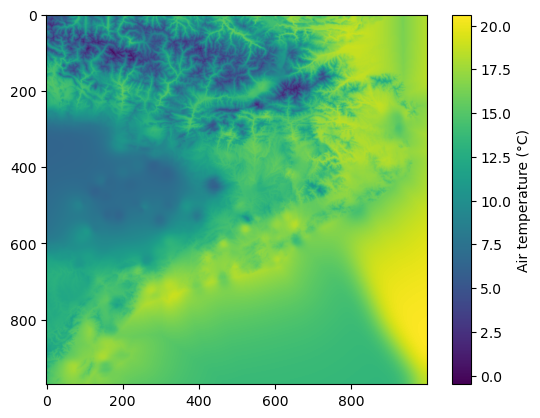

In [7]:
import matplotlib.pyplot as plt

plt.imshow(data_field)
plt.colorbar(label='Air temperature (\u00b0C)')

Finally, we can save the result into a GeoTIFF file using `save_file()` from `PyMica` class.

In [8]:
mlr_id2d_clusters_method.save_file("sample-data/results/mlr_id2d_clusters.tif")

We have now completed this tutorial on interpolating station data using the `mlr+id2d` methodology with clusters. You can experiment by changing the cluster files to observe how different cluster numbers impact the interpolation results. If you wish to use `mlr+id3d`, the process would be similar.